In [1]:
import os

import scipy
from scipy import stats
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Загрузка данных

In [2]:
paths = glob.glob(f"csv_particle_source/concat_res.csv")

In [3]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data = pd.concat((data, item), ignore_index=True)

## Первичная статистика ускорителя

In [4]:
data = data.dropna()
data

,name,x,y,z,vx,vy,vz,E
0,neutron,13.230400,19.26200,42.0000,18.639600,15.233000,24.211700,0.620131
1,gamma,0.026971,-1.70466,42.0000,0.057835,-0.282229,5.817630,1.894110
2,e-,0.037491,-1.75600,43.0583,0.002876,-0.020982,0.008475,0.000463
3,e-,0.037491,-1.75600,43.0583,-0.469102,0.730839,4.325290,3.689790
4,gamma,-13.686600,19.14850,42.0000,-0.484004,1.005540,2.091600,2.370690
...,...,...,...,...,...,...,...,...
79744,gamma,16.777600,17.45930,42.0000,0.159657,0.118082,0.336371,0.291491
79745,e-,19.039900,19.13250,46.7663,0.312245,0.048060,0.106323,0.000000
79746,gamma,-12.256500,-19.14420,42.0000,-0.127816,-0.184392,0.462301,0.513868
79747,gamma,-5.316750,14.18350,42.0000,-0.228585,0.456960,1.921820,1.822860


In [5]:
l = len(data)
res = []
for name in set(data['name']):
    count = len(data[data['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,nu_e,987,1.237633
1,O16,796,0.998132
2,gamma,49375,61.913002
3,e-,22184,27.817277
4,O17,1,0.001254
5,anti_nu_e,1148,1.439516
6,neutron,2894,3.628886
7,proton,1973,2.474012
8,e+,391,0.490288


## Распределение по координатам

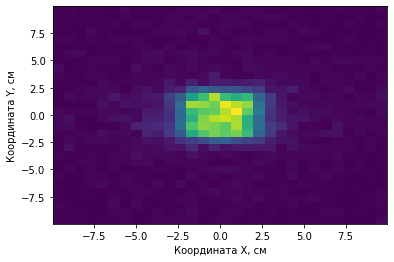

In [7]:
center = data[(-10 < data['x']) & (data['x'] < 10) & (-10 < data['y']) & (data['y'] < 10)]
plt.hist2d(center['x'], center['y'], bins=30)
# plt.title('Плотность частиц')
plt.xlabel('Координата X, см')
plt.ylabel('Координата Y, см')
plt.show()

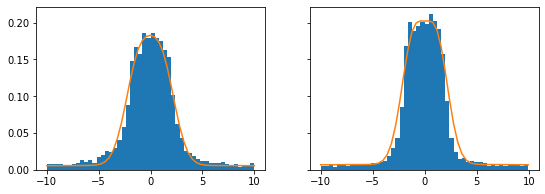

In [9]:
cnt_x = np.array(center['x'], dtype=float)
cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = stats.norm.fit(cnt_x)
best_fit_line1 = stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = stats.norm.pdf(bins, mu, sigma*10)
axs[0].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.4)

_, bins, _ = axs[1].hist(cnt_y, 50, density=True)
mu, sigma = stats.norm.fit(cnt_y)
best_fit_line1 = stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = stats.norm.pdf(bins, mu, sigma*10)
axs[1].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.2)

plt.show()

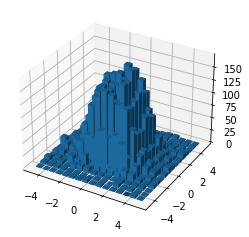

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## Распределение по энергиям (взяты только гамма и электроны)

In [9]:
center = data[(-4 < data['x']) & (data['x'] < 4) & (-4 < data['y']) & (data['y'] < 4)]

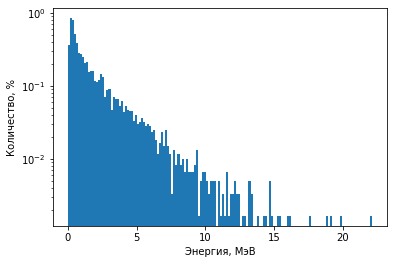

In [59]:
center_gamma = center[center['name'] == 'gamma']
weights, energys, _ = plt.hist(center_gamma['E'], bins=150, density=True)
plt.yscale("log")
plt.ylabel('Количество, %')
plt.xlabel('Энергия, МэВ')
plt.show()

with open('linac_gamma_hist.dat', 'w+') as f:
    for e, w in zip(energys[1:], weights):
        if w != 0.0:
            f.write(str(e) + ' ' + str(w) +'\n')

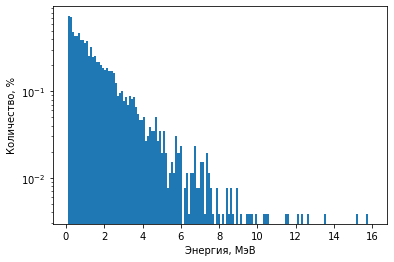

In [60]:
center_e = center[center['name'] == 'e-']
weights, energys, _ = plt.hist(center_e['E'], bins=150, density=True, range=(0.1, 16))
plt.yscale("log")
plt.ylabel('Количество, %')
plt.xlabel('Энергия, МэВ')
plt.show()

with open('linac_e_hist.dat', 'w+') as f:
    for e, w in zip(energys[1:], weights):
        if w != 0.0:
            f.write(str(e) + ' ' + str(w) +'\n')

## Распределение по скоростям

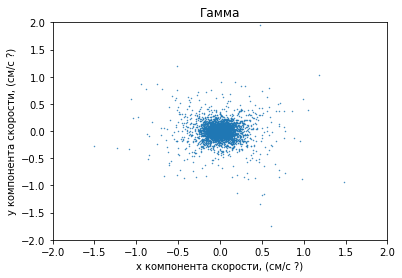

In [15]:
plt.scatter(center_gamma['vx'], center_gamma['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Гамма')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

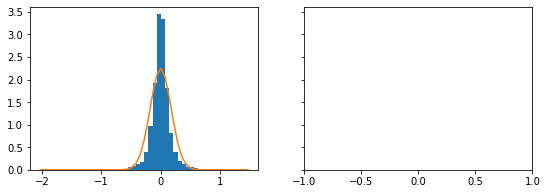

In [27]:
cnt_x = np.array(center_gamma['vx'], dtype=float)
# plt.hist(center_gamma['vx'], bins=100)

# cnt_x = np.array(center['x'], dtype=float)
# cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = stats.norm.fit(cnt_x)
best_fit_line1 = stats.norm.pdf(bins, mu, sigma)
axs[0].plot(bins, best_fit_line1)

# _, bins, _ = axs[1].hist(cnt_y, 50, density=True)
# mu, sigma = stats.norm.fit(cnt_y)
# best_fit_line1 = stats.norm.pdf(bins, mu+1.13, sigma*0.45)
# best_fit_line2 = stats.norm.pdf(bins, mu-1.13, sigma*0.45)
# best_fit_line3 = stats.norm.pdf(bins, mu, sigma*10)
# axs[1].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.2)


plt.xlim([-1., 1])
plt.show()

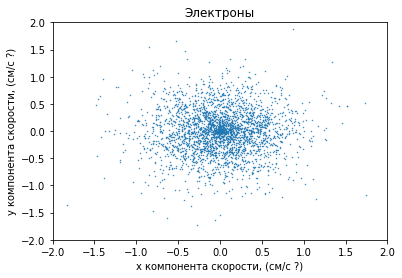

In [16]:
plt.scatter(center_e['vx'], center_e['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Электроны')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

## Визуализация векторов скоростей

In [61]:
to_viz = center_gamma[['x','y','z', 'vx','vy','vz']]

In [62]:
to_viz = to_viz[:500].T.to_numpy()
to_viz.shape

(6, 500)

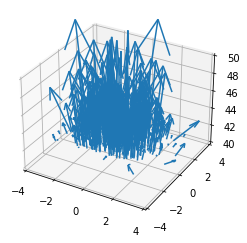

In [63]:
X, Y, Z, U, V, W = [to_viz[cor_vel] for cor_vel in range(len(to_viz))]
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_proj_type('persp')
ax3d.quiver(X, Y, Z, U, V, W)
ax3d.set_xlim([-4, 4])
ax3d.set_ylim([-4, 4])
ax3d.set_zlim([40, 50])
plt.show()